 ## <div align="center"> Track Unit Interview - Contoso Business Case


<table><tr>
<td> <img src=https://trackunit.com/wp-content/uploads/2022/05/untitled-1-01-300x300.png alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="https://scontent-cph2-1.xx.fbcdn.net/v/t39.30808-6/302449857_485179326949281_2799715128386146538_n.jpg?_nc_cat=102&ccb=1-7&_nc_sid=09cbfe&_nc_ohc=hjYr3KClPxMAX8N-8Wa&_nc_ht=scontent-cph2-1.xx&oh=00_AfBrCKx9DIdRBSRw8-cGc3ji27l9Ue9KOSoaN_NHuCPPHQ&oe=6418D783" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>
    
### - Interviewers: Rasmus Lindblad Sørensen & 	Sanne Ærensgaard
### - Role: Data Scientist
### - Candidate: Juan Pablo Lauricella

# Business case 


Contoso is a company that produces high-quality coffee and coffee machines. They sell the
products through their Contoso Coffee website. The company wants to understand the value
(revenue) that their customers can generate in the next 12 months. Knowing the expected
value of their customers in the next 12 months will help them steer their customer success
efforts on high value customers.

# Tasks
With a growing customer base, it is important to Contoso to understand how to make the best
use of their Customer Success Managers to get the most value out of their limited time.
You have been provided with the datasets contacts, subscriptionhistory, and website.
You are encouraged to describe assumptions you make about the data, and to reflect on what
you might do with access to additional data.


1. To better understand Contoso’s customers, you are asked to analyze the customer
data to identify key features or interesting patterns in the customer data. You will
present you findings using graphs of your choice.



2. If you were to implement a machine learning model to identify high potential customers,
how would you approach it and what parameters would you find to be relevant.

# Methodology


First step is related to the understanding of the provided datasets. 
Data cleaning and wrangling have been made using the following libraries:
- Pandas
- Numpy
    


Next, the main data insights were presented with visualizalizations. The following libraries have been used:
- MatplotLib
- Seaborn
    
For machine learning purposes, the following libraries have been used:
- Scikit-Learn
- Seaborn

Finally, conclusions can be founded at the end of the analysis. 

## Import Libraries

In [91]:
#Import libraries:

#For Data Wrangling
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#For Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

## Import CSVs files

In [92]:
#Read CSVs
Contacts = pd.read_csv('C:/Users/Administrator/Desktop/Facu/Track Unit BC/contacts.csv', sep=';')
Subscriptions = pd.read_csv('C:/Users/Administrator/Desktop/Facu/Track Unit BC/subscriptionhistory.csv', sep=';')
Websites = pd.read_csv('C:/Users/Administrator/Desktop/Facu/Track Unit BC/website.csv', sep=';')

## Columns content

In [93]:
Contacts.columns

Index(['ContactId', 'FirstName', 'LastName', 'FullName', 'DateOfBirth',
       'Gender', 'EMail', 'Telephone', 'PostCode', 'StreetAddress', 'City',
       'State', 'Country', 'CreatedOn', 'Loyalty Tier', 'Email Subscriber',
       'Income', 'Occupation', 'CustomerSatisfaction'],
      dtype='object')

In [94]:
Subscriptions.columns

Index(['CustomerID', 'SubscriptionID', 'SubscriptionAmount',
       'SubscriptionEndDate', 'SubscriptionStartDate', 'TransactionDate',
       'SubscriptionType', 'IsRecurring', 'is_auto_renew',
       'RecurringFrequencyInMonths'],
      dtype='object')

In [95]:
Websites.columns

Index(['ReviewId', 'UserId', 'ReviewText', 'ActivityTypeDisplay',
       'ReviewRating', 'ReviewDate'],
      dtype='object')

## Considerations:
- For this particular case, the selected datasets were Contacts and SubscriptionHistory.
- The machine learning step intends to find the best model among several statistical approaches. In this occasion, the idea would be to predict the next **customer's occupation** in order to know where the company's efforts should be reflected.

## Task 1 - Data Insights

## Data Cleaning/Wrangling

**_Data merging in a single dataset. Key on 'CustomerID'_**

In [96]:
#Merge DFs
DF = pd.merge(Subscriptions,Contacts, left_on='CustomerID', right_on='ContactId')

DF.head(5)

,CustomerID,SubscriptionID,SubscriptionAmount,SubscriptionEndDate,SubscriptionStartDate,TransactionDate,SubscriptionType,IsRecurring,is_auto_renew,RecurringFrequencyInMonths,...,StreetAddress,City,State,Country,CreatedOn,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction
0,CNTID_1388,41,129,01/31/2017 12:00:00 AM,12/31/2016 12:00:00 AM,12/31/2016 12:00:00 AM,SubscriptionHistory,True,True,1,...,2788 Cynthia Inlet,Elk Grove,California,USA,1/31/2019,medium,Yes,70240,Software Engineer,low
1,CNTID_1388,41,129,02/28/2017 12:00:00 AM,01/31/2017 12:00:00 AM,01/31/2017 12:00:00 AM,SubscriptionHistory,True,True,1,...,2788 Cynthia Inlet,Elk Grove,California,USA,1/31/2019,medium,Yes,70240,Software Engineer,low
2,CNTID_1388,41,129,04/30/2017 12:00:00 AM,03/31/2017 12:00:00 AM,03/31/2017 12:00:00 AM,SubscriptionHistory,True,True,1,...,2788 Cynthia Inlet,Elk Grove,California,USA,1/31/2019,medium,Yes,70240,Software Engineer,low
3,CNTID_1388,41,129,10/31/2016 12:00:00 AM,09/30/2016 12:00:00 AM,09/30/2016 12:00:00 AM,SubscriptionHistory,True,True,1,...,2788 Cynthia Inlet,Elk Grove,California,USA,1/31/2019,medium,Yes,70240,Software Engineer,low
4,CNTID_1388,41,129,03/31/2017 12:00:00 AM,02/28/2017 12:00:00 AM,02/28/2017 12:00:00 AM,SubscriptionHistory,True,True,1,...,2788 Cynthia Inlet,Elk Grove,California,USA,1/31/2019,medium,Yes,70240,Software Engineer,low


**_Dataset Statistics_**

In [97]:
DF.describe()

,SubscriptionID,SubscriptionAmount,RecurringFrequencyInMonths,PostCode,Income
count,51325.000000,51325.000000,51325.0,51325.000000,51325.000000
mean,38.641578,201.435032,1.0,54940.312343,82838.357740
std,3.807407,235.323849,0.0,25715.392682,58231.200358
min,2.000000,0.000000,1.0,10000.000000,20000.000000
25%,38.000000,138.000000,1.0,33143.000000,35313.000000
50%,40.000000,182.000000,1.0,54549.000000,74135.000000
75%,41.000000,217.000000,1.0,76840.000000,112055.000000
max,41.000000,2779.000000,1.0,99987.000000,419076.000000


In [98]:
#Data info
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51325 entries, 0 to 51324
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  51325 non-null  object 
 1   SubscriptionID              51325 non-null  int64  
 2   SubscriptionAmount          51325 non-null  int64  
 3   SubscriptionEndDate         51325 non-null  object 
 4   SubscriptionStartDate       51325 non-null  object 
 5   TransactionDate             51325 non-null  object 
 6   SubscriptionType            51325 non-null  object 
 7   IsRecurring                 51325 non-null  bool   
 8   is_auto_renew               51325 non-null  bool   
 9   RecurringFrequencyInMonths  51325 non-null  int64  
 10  ContactId                   51325 non-null  object 
 11  FirstName                   51325 non-null  object 
 12  LastName                    51325 non-null  object 
 13  FullName                    513

**_Remove useless columns for the first analysis._**

In [99]:
#Remove unnecessary columns

DF = DF.drop(['ContactId','FirstName','LastName','EMail','Telephone','PostCode','StreetAddress'], axis=1)

DF.head(5)

,CustomerID,SubscriptionID,SubscriptionAmount,SubscriptionEndDate,SubscriptionStartDate,TransactionDate,SubscriptionType,IsRecurring,is_auto_renew,RecurringFrequencyInMonths,...,Gender,City,State,Country,CreatedOn,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction
0,CNTID_1388,41,129,01/31/2017 12:00:00 AM,12/31/2016 12:00:00 AM,12/31/2016 12:00:00 AM,SubscriptionHistory,True,True,1,...,Male,Elk Grove,California,USA,1/31/2019,medium,Yes,70240,Software Engineer,low
1,CNTID_1388,41,129,02/28/2017 12:00:00 AM,01/31/2017 12:00:00 AM,01/31/2017 12:00:00 AM,SubscriptionHistory,True,True,1,...,Male,Elk Grove,California,USA,1/31/2019,medium,Yes,70240,Software Engineer,low
2,CNTID_1388,41,129,04/30/2017 12:00:00 AM,03/31/2017 12:00:00 AM,03/31/2017 12:00:00 AM,SubscriptionHistory,True,True,1,...,Male,Elk Grove,California,USA,1/31/2019,medium,Yes,70240,Software Engineer,low
3,CNTID_1388,41,129,10/31/2016 12:00:00 AM,09/30/2016 12:00:00 AM,09/30/2016 12:00:00 AM,SubscriptionHistory,True,True,1,...,Male,Elk Grove,California,USA,1/31/2019,medium,Yes,70240,Software Engineer,low
4,CNTID_1388,41,129,03/31/2017 12:00:00 AM,02/28/2017 12:00:00 AM,02/28/2017 12:00:00 AM,SubscriptionHistory,True,True,1,...,Male,Elk Grove,California,USA,1/31/2019,medium,Yes,70240,Software Engineer,low


**_Created ranges of Ages for segmentation purposes'_**

In [100]:
#Add Age column and AgeRange
TodaysDate = pd.to_datetime('today')
DF['DateOfBirth'] = pd.to_datetime(DF['DateOfBirth'])


DF['Age'] = (TodaysDate - DF['DateOfBirth']).astype('<m8[Y]')

DF['AgeRange'] = pd.cut(DF['Age'],[0,18,30,45,55,70,90])

DF[['Age','AgeRange']].head(10)

,Age,AgeRange
0,39.0,"(30, 45]"
1,39.0,"(30, 45]"
2,39.0,"(30, 45]"
3,39.0,"(30, 45]"
4,39.0,"(30, 45]"
5,39.0,"(30, 45]"
6,39.0,"(30, 45]"
7,33.0,"(30, 45]"
8,23.0,"(18, 30]"
9,23.0,"(18, 30]"


## Group and aggregation operations

At this point, the focus is to get specific information for each of the customers. In other words, to get a table with unique customers and its features values.

**_Grouped by 'CustomerID' and 'SubscriptionID' to get the sum, the average and the quantity of the amounts_**

In [14]:
#Group information and make aggregation
TopAmountSubs = DF.groupby(['CustomerID'], as_index = False)['SubscriptionAmount'].sum() #$ Amount in terms of Subscroptions

SubsPerCust = DF.groupby(['CustomerID'], as_index = False)['SubscriptionID'].nunique() #of Unique subscriptions 

unique_customer = pd.merge(TopAmountSubs,SubsPerCust, on = 'CustomerID')

unique_customer['AvgSubscriptionSpend'] = round(unique_customer['SubscriptionAmount']/unique_customer['SubscriptionID'],2)

unique_customer = unique_customer.rename(columns= {'SubscriptionID': '# of Subscriptions'})

unique_customer

#unique_customer[unique_customer['# of Subscriptions'] > 2]

,CustomerID,SubscriptionAmount,# of Subscriptions,AvgSubscriptionSpend
0,CNTID_1001,1696,1,1696.0
1,CNTID_1002,0,1,0.0
2,CNTID_1003,2706,1,2706.0
3,CNTID_1004,1870,1,1870.0
4,CNTID_1006,1211,1,1211.0
...,...,...,...,...
4993,CNTID_5995,0,1,0.0
4994,CNTID_5996,0,1,0.0
4995,CNTID_5997,1785,1,1785.0
4996,CNTID_5998,2400,1,2400.0


**_Creation of final dataset with the grouped information_**

In [15]:
#Create final DF with grouped fields + demographic columns & Personal Info

DfTotal = pd.merge(unique_customer, DF[['CustomerID','FullName','DateOfBirth','Gender','City','State','Country','CreatedOn','Loyalty Tier','Email Subscriber','Income','Occupation','CustomerSatisfaction','Age','AgeRange']].drop_duplicates(), on = 'CustomerID')
                                     
DfTotal

,CustomerID,SubscriptionAmount,# of Subscriptions,AvgSubscriptionSpend,FullName,DateOfBirth,Gender,City,State,Country,CreatedOn,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction,Age,AgeRange
0,CNTID_1001,1696,1,1696.0,Beraun Kenneth,1974-08-01,Male,Amarillo,Texas,USA,12/23/2018,medium,Yes,46732,Teacher,high,48.0,"(45, 55]"
1,CNTID_1002,0,1,0.0,Acthony Koteles,1975-08-28,Male,Inglewood,California,USA,1/14/2019,medium,Yes,20000,Teacher,high,47.0,"(45, 55]"
2,CNTID_1003,2706,1,2706.0,Michael Lauser,2006-09-03,Male,Nashville,Tennessee,USA,1/17/2019,medium,No,61918,Teacher,medium,16.0,"(0, 18]"
3,CNTID_1004,1870,1,1870.0,Nakada Richard,1997-07-30,Male,West Covina,California,USA,1/20/2019,medium,No,20000,Teacher,medium,25.0,"(18, 30]"
4,CNTID_1006,1211,1,1211.0,Steven Biondi,2016-09-20,Male,Surprise,Arizona,USA,1/31/2019,medium,No,49263,Software Engineer,low,6.0,"(0, 18]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,CNTID_5995,0,1,0.0,Margaret yowser,1990-08-22,Female,Inglewood,California,USA,1/31/2019,medium,Yes,20000,Teacher,medium,32.0,"(30, 45]"
4994,CNTID_5996,0,1,0.0,Lisa Delahoussaye,1983-07-06,Female,El Paso,Texas,USA,1/31/2019,medium,No,57950,Teacher,medium,39.0,"(30, 45]"
4995,CNTID_5997,1785,1,1785.0,Sobrowski Mary,1981-04-20,Female,Davie,Florida,USA,1/31/2019,medium,No,20000,Teacher,high,41.0,"(30, 45]"
4996,CNTID_5998,2400,1,2400.0,Mary Hodbon,1970-12-25,Female,Lincoln,Nebraska,USA,1/31/2019,medium,No,38996,Teacher,medium,52.0,"(45, 55]"


In [16]:
DfTotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerID            4998 non-null   object        
 1   SubscriptionAmount    4998 non-null   int64         
 2   # of Subscriptions    4998 non-null   int64         
 3   AvgSubscriptionSpend  4998 non-null   float64       
 4   FullName              4998 non-null   object        
 5   DateOfBirth           4998 non-null   datetime64[ns]
 6   Gender                4998 non-null   object        
 7   City                  4998 non-null   object        
 8   State                 4998 non-null   object        
 9   Country               4998 non-null   object        
 10  CreatedOn             4998 non-null   object        
 11  Loyalty Tier          4998 non-null   object        
 12  Email Subscriber      4998 non-null   object        
 13  Income            

In [17]:
#Number of unique customers
print('The number of unique customers is: {} '.format(DfTotal['CustomerID'].nunique()))

The number of unique customers is: 4998 


# Visualization of results

 **_Preparation of visualization functions for further feature analysis_**

In [103]:
# Prepare a function for ploting all the features
def plot_demography(features, color):
    ax = DfTotal.groupby(features)['CustomerID'].count().sort_values().plot(x=features, y ='count', kind='barh',\
              figsize=(5,4), fontsize=12, width = 0.8, color = color, zorder=3)
    ax.set_title("Customer distribution by " + str(features), fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    ax.grid(color = 'w', zorder=0)

    for spine in ax.spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_facecolor('whitesmoke')
        
    
    plt.figure()
    DfTotal[features].value_counts().plot.pie(textprops={'color':"w"},pctdistance=0.7,autopct='%.2f%%', figsize=(6,6),labels=None,subplots=True)
    plt.title(str(features) +' Percentage Distribution',fontsize=14,ha='right')
    plt.legend(labels=DfTotal[features].value_counts().index, loc="best",bbox_to_anchor=(1, 0.25, 0.5, 0.5))
    plt.show()
        
# Prepare a function for showing table
def show_table(features):
    return DfTotal.groupby(features, as_index=False )['CustomerID'].count().sort_values('CustomerID',ascending = False)   

## Distribution by Gender

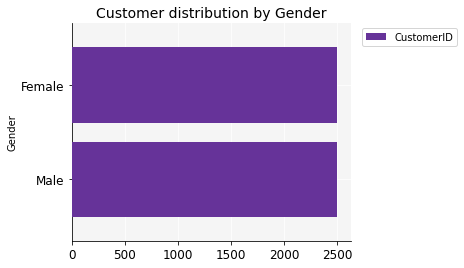

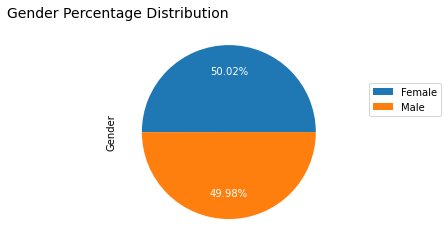

,Gender,CustomerID
0,Female,2500
1,Male,2498


In [104]:
#Distribution by Gender

plot_demography('Gender','rebeccapurple')
show_table('Gender')

## Distribution by Age Range

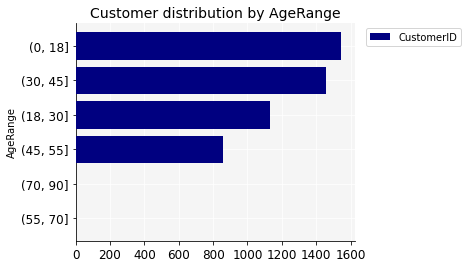

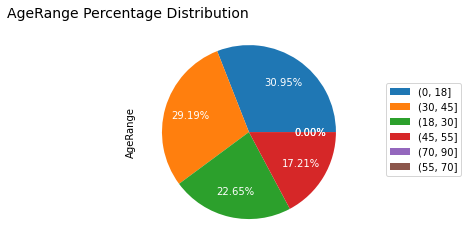

,AgeRange,CustomerID
0,"(0, 18]",1547
2,"(30, 45]",1459
1,"(18, 30]",1132
3,"(45, 55]",860
4,"(55, 70]",0
5,"(70, 90]",0


In [20]:
#Distribution by Age Range
plot_demography('AgeRange','navy')
show_table('AgeRange')


## Distribution by Customer Satisfaction

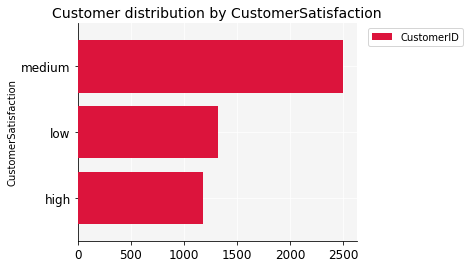

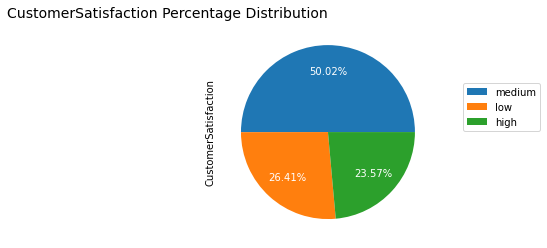

,CustomerSatisfaction,CustomerID
2,medium,2500
1,low,1320
0,high,1178


In [21]:
plot_demography('CustomerSatisfaction','crimson')
show_table('CustomerSatisfaction')

## Distribution by Occupation

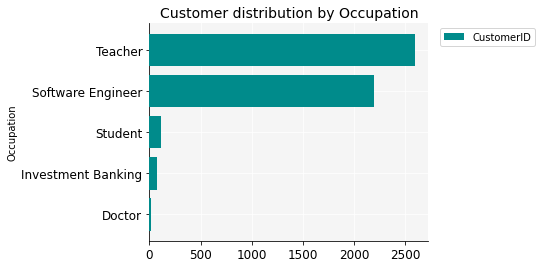

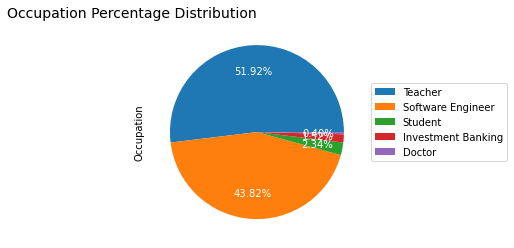

,Occupation,CustomerID
4,Teacher,2595
2,Software Engineer,2190
3,Student,117
1,Investment Banking,76
0,Doctor,20


In [105]:
plot_demography('Occupation','darkcyan')
show_table('Occupation')

## Distribution by State

In [23]:
#Customer State Distribution
display(DfTotal.groupby('State')['CustomerID'].count().sort_values(ascending = False).to_frame())

,CustomerID
State,
California,1185
Texas,609
Florida,359
Colorado,189
Arizona,175
Georgia,140
North Carolina,139
Washington,130
Illinois,128


## Distribution of average spend

 **_Preparation of visualization functions for spending analysis_**

In [24]:
# define a bar char function to plot all the features
def plot_bar_chart(col,axs):
    c = DfTotal.groupby(col, as_index=False ).agg({'CustomerID':'count', 'SubscriptionAmount': 'sum'})
    c['AVGSpend'] =  round(c['SubscriptionAmount']/c['CustomerID'],2)
    c.reset_index(inplace=True)
    sns.barplot(x=col, y='AVGSpend', data=c, ax=axs)
    axs.set_title('Customer spent by ' + str(col))

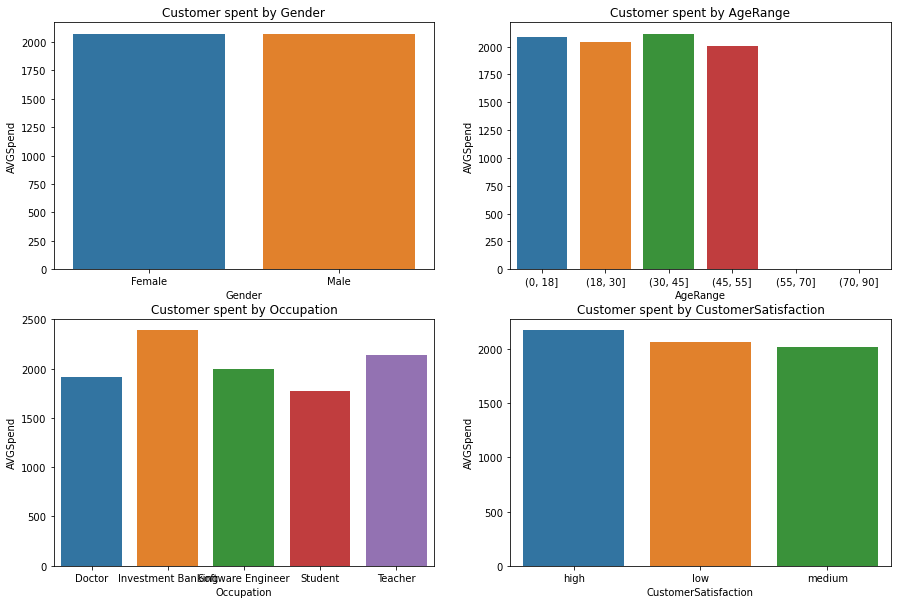

In [25]:
fig, ax = plt.subplots(2,2, figsize=(15,10))

plot_bar_chart('Gender',ax[0,0])
plot_bar_chart('AgeRange',ax[0,1])
plot_bar_chart('Occupation',ax[1,0])
plot_bar_chart('CustomerSatisfaction',ax[1,1])

## Distribution of top spendings

 **_Preparation of visualization functions for Top spending analysis_**

In [26]:
# define a function to show the spend by features of the customers
def most_spender(feature):
    c = DfTotal.groupby(feature, as_index=False ).agg({'CustomerID':'count', 'SubscriptionAmount': 'sum'})
    c['AVGSpend'] =  round(c['SubscriptionAmount']/c['CustomerID'],2)
    c['AVGSpend'] = c['AVGSpend'].apply(lambda x: '${:.2f}'.format(x))
    c = c.rename(columns={'CustomerID':'Customer_count'})
    
    s = c['SubscriptionAmount'].sum()
    c['percentage'] = c['SubscriptionAmount'] / s
    c['percentage'] = c['percentage'].apply(lambda x: '{:.2%}'.format(x))
    
    return c.sort_values('AVGSpend', ascending = False)

In [27]:
display(most_spender('Gender'))
display(most_spender('AgeRange'))
display(most_spender('Occupation'))
display(most_spender('CustomerSatisfaction'))

,Gender,Customer_count,SubscriptionAmount,AVGSpend,percentage
0,Female,2500,5174861,$2069.94,50.05%
1,Male,2498,5163792,$2067.17,49.95%


,AgeRange,Customer_count,SubscriptionAmount,AVGSpend,percentage
4,"(55, 70]",0,0,$nan,0.00%
5,"(70, 90]",0,0,$nan,0.00%
2,"(30, 45]",1459,3082864,$2113.00,29.82%
0,"(0, 18]",1547,3222960,$2083.36,31.17%
1,"(18, 30]",1132,2311464,$2041.93,22.36%
3,"(45, 55]",860,1721365,$2001.59,16.65%


,Occupation,Customer_count,SubscriptionAmount,AVGSpend,percentage
1,Investment Banking,76,181314,$2385.71,1.75%
4,Teacher,2595,5550700,$2139.00,53.69%
2,Software Engineer,2190,4361243,$1991.44,42.18%
0,Doctor,20,38287,$1914.35,0.37%
3,Student,117,207109,$1770.16,2.00%


,CustomerSatisfaction,Customer_count,SubscriptionAmount,AVGSpend,percentage
0,high,1178,2558460,$2171.87,24.75%
1,low,1320,2720671,$2061.11,26.32%
2,medium,2500,5059522,$2023.81,48.94%


## Conclusions

**Demographics**

1. Total number of customers: **4998**.


2. **Gender** is split in a rough **50%** between females and males (being females greater by **0.1%**).


3. **Age**: Most of the customers relies on the segments between **0-18**, represented by **31.17%**, followed by **30.45%**. The last portions represent the other 40% of the customers, being **18-30** and **45-55**.


4. **Occupation**: There are **5** different occupations. More than **90%** of them are **Teachers** and **Software Engineers**.

**Geographics**

All customers belong to **US** in a **100%**

**Top ten States with more customers**

1. California
2. Texas
3. Florida
4. Colorado
5. Arizona
6. Georgia
7. North Carolina
8. Washington
9. Illinois
10. Virginia

**Behavioral Segments**

**48%** of the customers think that the product deserves a 'medium' classification, compared to the low **(26%)** and high **(24%)**


## Data/analysis that could help improve current research

**Demographics**
- Customer household number/family size.
- Customer life cycle or status: married/single, number of children
- Customer health (hypertense/Diabetes/Allergic etc.)


**Geographics**
- Distance from store to the customer's home

**Psychographic data**
- Hobbies
- Sentiment analysis

**Behavioral Segments**
- Online/in store shopping?

## Spending analysis

- **Gender**: There is no really a good difference in this feature regarding the spending, as both genders spent almost **$2,070** on average. We still can confirm, that women spent **0,21%** in the same period.


- **Age Range**: The most spending category in average for this feature is related to the **30-45** segment. However, in terms of total subscription amounts, the segment **0-18** was the top category. 


- **Occupation**: with only **5** distinct occupations, the most relevant ones for the total subscriptions revenue comes from **Teachers** and **Software engineers**. Although on average the bankers spent more, they only represent **1.75%** of the customers.


- **Customer Satisfaction**: On average, most of these segments spend an approximate of **2,070**. Nevertheless, those who rated the service as **medium** represents a total subscriptions amount of **$5,059,522**, representing almost **49%** of the customers population. 


## Recommendations

**Communicate** with Advertisement/Marketing team to reach/be aware of the **following segments**:
- **Female**
- **Age between 0-45**
- **Teachers and Software Engineers**
- **low and medium satisfaction sectors**



# Task 2 - Machine Learning approach

_In the following section, we're going to train and test the data in order to predict the occupation of next customers. In other words, we're going to find the best machine learning model to guess the occupation of customers and see where to put the company's efforts for future campaigns._

**_Replicate the original dataframe, so we make sure everything's still the same in the previous analysis_**

In [46]:
#Machine Learning - Predict Next Customer's Occupation

DfCopy = DfTotal.copy()

DfCopy = DfCopy.drop(['CustomerID', 'FullName','AgeRange','DateOfBirth'],axis=1)

DfCopy

,SubscriptionAmount,# of Subscriptions,AvgSubscriptionSpend,Gender,City,State,Country,CreatedOn,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction,Age
0,1696,1,1696.0,Male,Amarillo,Texas,USA,12/23/2018,medium,Yes,46732,Teacher,high,48.0
1,0,1,0.0,Male,Inglewood,California,USA,1/14/2019,medium,Yes,20000,Teacher,high,47.0
2,2706,1,2706.0,Male,Nashville,Tennessee,USA,1/17/2019,medium,No,61918,Teacher,medium,16.0
3,1870,1,1870.0,Male,West Covina,California,USA,1/20/2019,medium,No,20000,Teacher,medium,25.0
4,1211,1,1211.0,Male,Surprise,Arizona,USA,1/31/2019,medium,No,49263,Software Engineer,low,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0,1,0.0,Female,Inglewood,California,USA,1/31/2019,medium,Yes,20000,Teacher,medium,32.0
4994,0,1,0.0,Female,El Paso,Texas,USA,1/31/2019,medium,No,57950,Teacher,medium,39.0
4995,1785,1,1785.0,Female,Davie,Florida,USA,1/31/2019,medium,No,20000,Teacher,high,41.0
4996,2400,1,2400.0,Female,Lincoln,Nebraska,USA,1/31/2019,medium,No,38996,Teacher,medium,52.0


**_Create Label encoder to convert categorical and other type of variables to int64 format_**

In [47]:
#Change categorical variables to numerical ones and the rest to int64
def label_encoder(y):
    le = LabelEncoder()
    DfCopy[y] = le.fit_transform(DfCopy[y])
 
label_list = ['AvgSubscriptionSpend','Gender','City','State',\
              'Country','CreatedOn','Loyalty Tier','Email Subscriber',\
              'Occupation','CustomerSatisfaction']
 
for l in label_list:
    label_encoder(l)
    
DfCopy

,SubscriptionAmount,# of Subscriptions,AvgSubscriptionSpend,Gender,City,State,Country,CreatedOn,Loyalty Tier,Email Subscriber,Income,Occupation,CustomerSatisfaction,Age
0,1696,1,1087,1,5,41,0,4,2,1,46732,4,0,48.0
1,0,1,0,1,121,4,0,0,2,1,20000,4,0,47.0
2,2706,1,1573,1,173,40,0,1,2,0,61918,4,2,16.0
3,1870,1,1180,1,287,4,0,2,2,0,20000,4,2,25.0
4,1211,1,800,1,259,2,0,3,2,0,49263,2,1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0,1,0,0,121,4,0,3,2,1,20000,4,2,32.0
4994,0,1,0,0,76,41,0,3,2,0,57950,4,2,39.0
4995,1785,1,1137,0,65,8,0,3,2,0,20000,4,0,41.0
4996,2400,1,1438,0,145,25,0,3,2,0,38996,4,2,52.0


**_Establish dependent and independent variables._**

**_Next, split the dataset in train (80% of data) and test (20% of data)_**

In [52]:
#Divide the dataset into independent and dependent variables

X = DfCopy.drop(['Occupation'], axis=1, inplace=False)
y = DfCopy['Occupation']

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, shuffle=True) 

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3998, 13)
X_test shape: (1000, 13)
y_train shape: (3998, 1)
y_test shape: (1000, 1)


**_Standarized the values, so that they have a mean value = 0 and Std. Deviation = 1 (Normal Distribution)_**

In [53]:
#Feature Scaling
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**_Create dictionaries to store the results of the different models_**

In [58]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

### Logistic Regression

In [59]:
#Logistic Regression
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))

Train Score: 0.6003035043804756
Test Score: 0.591


In [60]:
#Store result in dictionaries
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

### KNN Classifier

In [61]:
#KNN Classifier
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

Train Score: 0.6488260325406758
Test Score: 0.652


In [62]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(X_test,y_test)

### SVM (Support Vector Machine)

In [63]:
#Support Vector Machine
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.7218613892365456
Test Score: 0.711


In [64]:
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)

### Decision Tree Classifier

In [68]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

Train Score: 0.6518194618272841
Test Score: 0.643


In [69]:
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)

### Random Forest Classifier

In [71]:
#Random Forest Classifier
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))

Train Score: 0.7248642052565707
Test Score: 0.729


In [72]:
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)

### Naive Bayes Classifier

In [73]:
#Naïve Bayes Classifier
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(X_test,y_test))

Train Score: 0.3884427409261577
Test Score: 0.508


In [74]:
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(X_test,y_test)

Now that we've just completed the different modelling options, let's see which one of them presents the best **scores** to implement.

### Train Results

In [78]:
#Compare accuracy for train results
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train.sort_values(["Score"],ascending = False)

,Score
Random Forest Train Score,0.724864
SVM Train Score,0.721861
Decision Tree Train Score,0.651819
KNN Train Score,0.648826
Logistic Train Score,0.600304
Gaussian NB Train Score,0.388443


### Test Results

In [79]:
#Compare accuracy for test results
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test.sort_values(["Score"],ascending = False)

,Score
Random Forest Test Score,0.729
SVM Test Score,0.711
KNN Test Score,0.652
Decision Tree Test Score,0.643
Logistic Test Score,0.591
Gaussian NB Test Score,0.508


### Visualization of different modelling scores

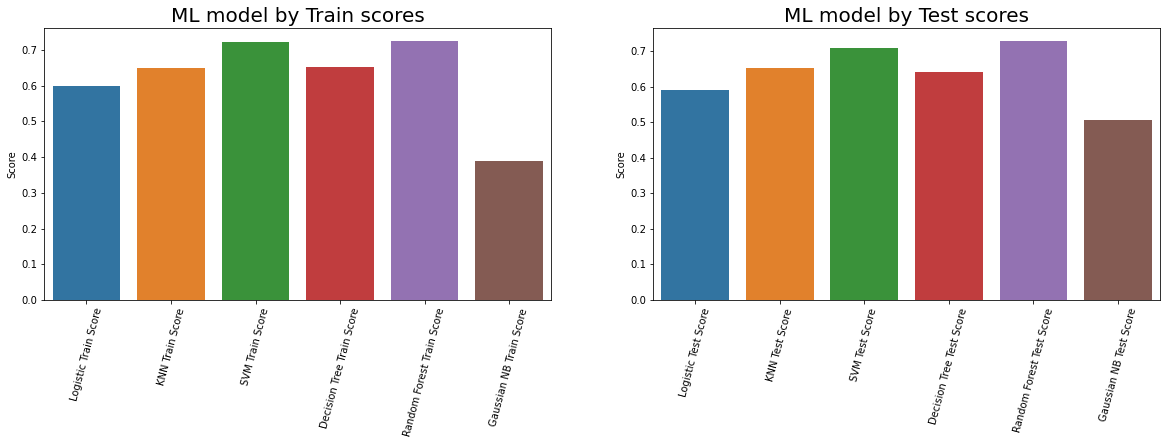

In [85]:
#Graphing of the scores
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
ax[0].set_title('ML model by Train scores', fontdict={'fontsize': 20, 'fontweight': 'medium'})
ax[1].set_title('ML model by Test scores', fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.show()

## Conclusions

As we've just seen amongs the proposed different machine learning models, the one which scored the best in both test and train enviroments i **Random Forest**.

Few considerations about this ML model:

**Pros:**
- **Accuracy**: Random Forest models can be highly accurate and provide reliable predictions on both small and large datasets

- **Robustness**: Random Forest models are less sensitive to noise and outliers than other models. They can handle missing values and maintain their accuracy with high-dimensional datasets.

- **Reduced risk of overfitting**: Random Forest models are less prone to overfitting compared to other models like decision trees.

**Cons:**
- **Computationally expensive**: Training a Random Forest model can be computationally expensive, especially when working with large datasets or many trees.

- **Memory-intensive**: Random Forest models can require significant memory resources when working with large datasets.

- **Prediction time**: Although Random Forest models are fast to predict, they may be slower than other models that have been optimized for prediction speed.

Random Forest models are a powerful tool in machine learning with high accuracy, robustness, and feature selection capabilities. However, they also have limitations in terms of interpretability, computational requirements, and potential biases.

In this particular case, it would help us to identify next customer's occupation, meaning that we would know where to put the marketing efforts. As we've seen in this dataset, most of the customers are Teachers or Software Engineers.
